<a href="https://colab.research.google.com/github/williamedwardhahn/ComplexSystems/blob/main/Truncated_Normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import torch
import numpy as np
import matplotlib.pyplot as plt 

The box-muller trick is to sample, uniformly between 0 and 1 two random variables, U1 and U2. Then, you can verify that

Z = sqrt(-2*log(U1)) * cos(2*pi*U2) = R*cos(Theta)

follows a normal distribution. Now, we want to create Z only living between -2 and 2. For this truncation, we still accept all the angles Theta, but we just want the ray R bigger than -2 and smaller than 2. In other words:

-2 <= sqrt(-2*log(U1)) <= 2

iif U1 is uniformly sampled between exp(-2) and 1 :slight_smile:
Then you have the python function:

In [24]:
# sample u1:
size = (100000,)
u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
# sample u2:
u2 = torch.rand(size)
# sample the truncated gaussian ~TN(0,1,[-2,2]):
z = torch.sqrt(-2*np.log(u1)) * torch.cos(2*np.pi*u2)

In [25]:
z

tensor([-0.3111, -0.4990,  0.4996,  ..., -1.8370,  1.2226,  0.2260])

(array([ 2189.,  6008., 10212., 14442., 17300., 17051., 14455., 10248.,
         5911.,  2184.]),
 array([-1.9998083e+00, -1.5999368e+00, -1.2000655e+00, -8.0019403e-01,
        -4.0032262e-01, -4.5120716e-04,  3.9942020e-01,  7.9929161e-01,
         1.1991631e+00,  1.5990344e+00,  1.9989059e+00], dtype=float32),
 <a list of 10 Patch objects>)

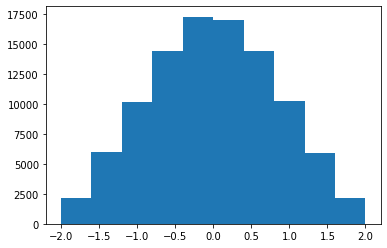

In [26]:
plt.hist(z)

(array([3.2000e+01, 5.4200e+02, 4.1100e+03, 1.5694e+04, 3.0419e+04,
        3.0123e+04, 1.4981e+04, 3.6130e+03, 4.5700e+02, 2.9000e+01]),
 array([-4.2416606 , -3.388572  , -2.5354834 , -1.6823949 , -0.8293063 ,
         0.02378225,  0.8768708 ,  1.7299594 ,  2.5830479 ,  3.4361365 ,
         4.289225  ], dtype=float32),
 <a list of 10 Patch objects>)

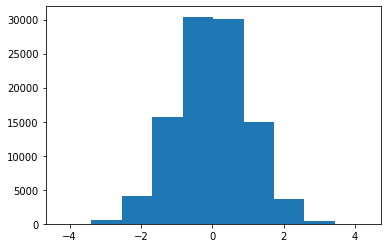

In [27]:
plt.hist(torch.randn(size))